In [1]:
import pandas as pd

df_sorted = pd.read_json('df_sorted.json').transpose()

In [2]:
import json

with open("./data/test.json", "r") as f:
    ground_truth = json.load(f)

In [3]:
overall_stats = {}
for issue_details in ground_truth:
    issue_counter = {}
    try:
        with open(f"./data/GroundTruthScoring/v1/{issue_details['instance_id']}.json", "r") as f:
            ai_score_details = json.load(f)
        with open(f"./data/RAG_triad_eval/v1/{issue_details['instance_id']}.json", "r") as f:
            generated_details = json.load(f)
        if issue_details['instance_id'] not in df_sorted["rescaled_performance_score"]:
            continue
        ai_score = ai_score_details['score']
        collected_data = generated_details["mayil_collected_data"]
        bouncer_score = collected_data["bouncer_response"]["score"]
        
        issue_counter['AI_Score'] = ai_score
        issue_counter['Bouncer_Score'] = bouncer_score
        issue_counter['context_relevance'] = collected_data["context_relevance"]*10
        # issue_counter['groundedness_score'] = collected_data["groundedness_score"]*10
        issue_counter['qa_relevance'] = collected_data["qa_relevance"]*10
        #rescaled_performance_score
        # percent_modified_files_not_fetched
        # percent_recommended_snippets_modified
        issue_counter['rag_score'] = df_sorted["rescaled_performance_score"][issue_details['instance_id']] / 10

    except Exception as e:
        print(f"Error for {issue_details['instance_id']}: {e}")
        continue
    overall_stats[issue_details["instance_id"]] = issue_counter

Error for astropy__astropy-11693: [Errno 2] No such file or directory: './data/RAG_triad_eval/v1/astropy__astropy-11693.json'
Error for astropy__astropy-13842: [Errno 2] No such file or directory: './data/GroundTruthScoring/v1/astropy__astropy-13842.json'
Error for django__django-11669: [Errno 2] No such file or directory: './data/GroundTruthScoring/v1/django__django-11669.json'
Error for django__django-13128: [Errno 2] No such file or directory: './data/GroundTruthScoring/v1/django__django-13128.json'
Error for matplotlib__matplotlib-23140: [Errno 2] No such file or directory: './data/GroundTruthScoring/v1/matplotlib__matplotlib-23140.json'
Error for pydata__xarray-4683: [Errno 2] No such file or directory: './data/GroundTruthScoring/v1/pydata__xarray-4683.json'
Error for pytest-dev__pytest-11160: [Errno 2] No such file or directory: './data/GroundTruthScoring/v1/pytest-dev__pytest-11160.json'
Error for pytest-dev__pytest-7490: [Errno 2] No such file or directory: './data/GroundTruthS

                   AI_Score  Bouncer_Score  context_relevance  qa_relevance  \
AI_Score           1.000000       0.467402           0.151840      0.324157   
Bouncer_Score      0.467402       1.000000           0.174006      0.678207   
context_relevance  0.151840       0.174006           1.000000      0.122503   
qa_relevance       0.324157       0.678207           0.122503      1.000000   
rag_score          0.306847       0.204080           0.249266      0.133285   

                   rag_score  
AI_Score            0.306847  
Bouncer_Score       0.204080  
context_relevance   0.249266  
qa_relevance        0.133285  
rag_score           1.000000  


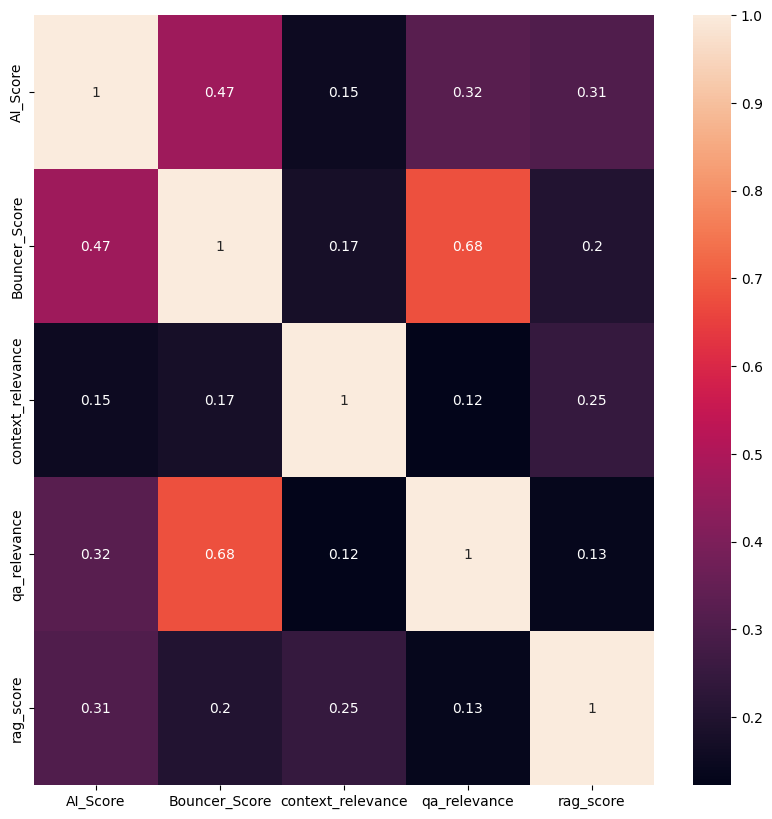

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.DataFrame.from_dict(overall_stats, orient='index')
# show correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


In [5]:
df[df["Bouncer_Score"]>9]["AI_Score"].describe()

count    14.000000
mean      8.357143
std       2.619664
min       0.000000
25%       8.250000
50%       9.000000
75%      10.000000
max      10.000000
Name: AI_Score, dtype: float64

In [6]:
from test_utils.helper import render_markdown_to_html
for case in df[df["AI_Score"]>9].index.tolist():
    data_loc = f"./data/RAG_triad_eval/v1/{case}.json"
    with open(data_loc, "r") as f:
        data = json.load(f)
    content = data["mayil_response"]
    issue_md = f"#{case}\n\n##{data['title']}\n\n{data['body']}"
    # render_markdown_to_html(issue_md, content)

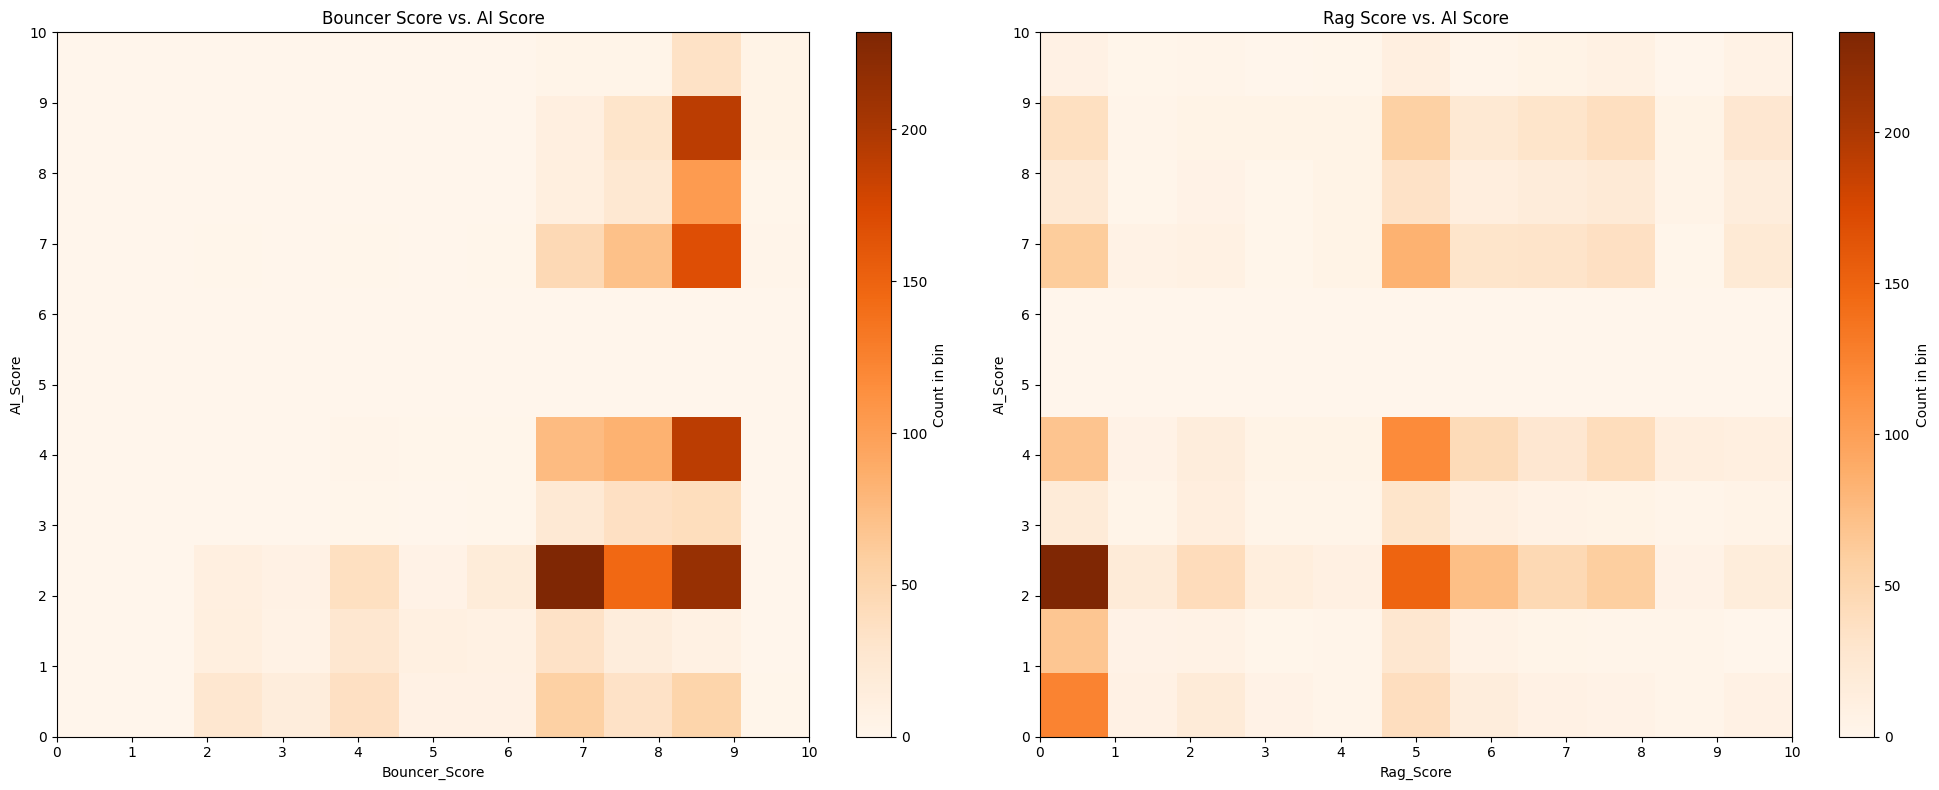

In [7]:
# plt.figure(figsize=(10, 10))
# sns.lineplot(data=df[["Bouncer_Score", "AI_Score"]].sort_values(by='Bouncer_Score'))
# # sns.lineplot(data=df[["rag_score", "AI_Score"]].sort_values(by='rag_score'))
# plt.xticks(np.linspace(0, len(df) - 1, num=20), labels=[str(int(x)) for x in np.linspace(1, len(df), num=20)], rotation=45)
# plt.show()
# plt.figure(figsize=(10, 8))
# plt.hexbin(df['Bouncer_Score'], df['AI_Score'], gridsize=50, cmap='Oranges', mincnt=1)
# plt.colorbar(label='Count in bin')
# plt.xlabel('Bouncer_Score')
# plt.ylabel('AI_Score')
# plt.title('Hexbin plot of Bouncer Score vs. AI Score')
# plt.show()
# Setting up the matplotlib figure for side-by-side 2D histograms.

fig, axes = plt.subplots(1, 2, figsize=(20, 8))



# 2D Histogram for Bouncer_Score vs. AI_Score

h1 = axes[0].hist2d(df['Bouncer_Score'], df['AI_Score'], bins=[11, 11], range=[[0, 10], [0, 10]], cmap='Oranges')

axes[0].set_title('Bouncer Score vs. AI Score')

axes[0].set_xlabel('Bouncer_Score')

axes[0].set_ylabel('AI_Score')

axes[0].set_xticks(np.arange(0, 11))

axes[0].set_yticks(np.arange(0, 11))

fig.colorbar(h1[3], ax=axes[0], label='Count in bin')



# 2D Histogram for rag_score vs. AI_Score

h2 = axes[1].hist2d(df['rag_score'], df['AI_Score'], bins=[11, 11], range=[[0, 10], [0, 10]], cmap='Oranges')

axes[1].set_title('Rag Score vs. AI Score')

axes[1].set_xlabel('Rag_Score')

axes[1].set_ylabel('AI_Score')

axes[1].set_xticks(np.arange(0, 11))

axes[1].set_yticks(np.arange(0, 11))

fig.colorbar(h2[3], ax=axes[1], label='Count in bin')



# Display the plots

plt.tight_layout()

plt.show()

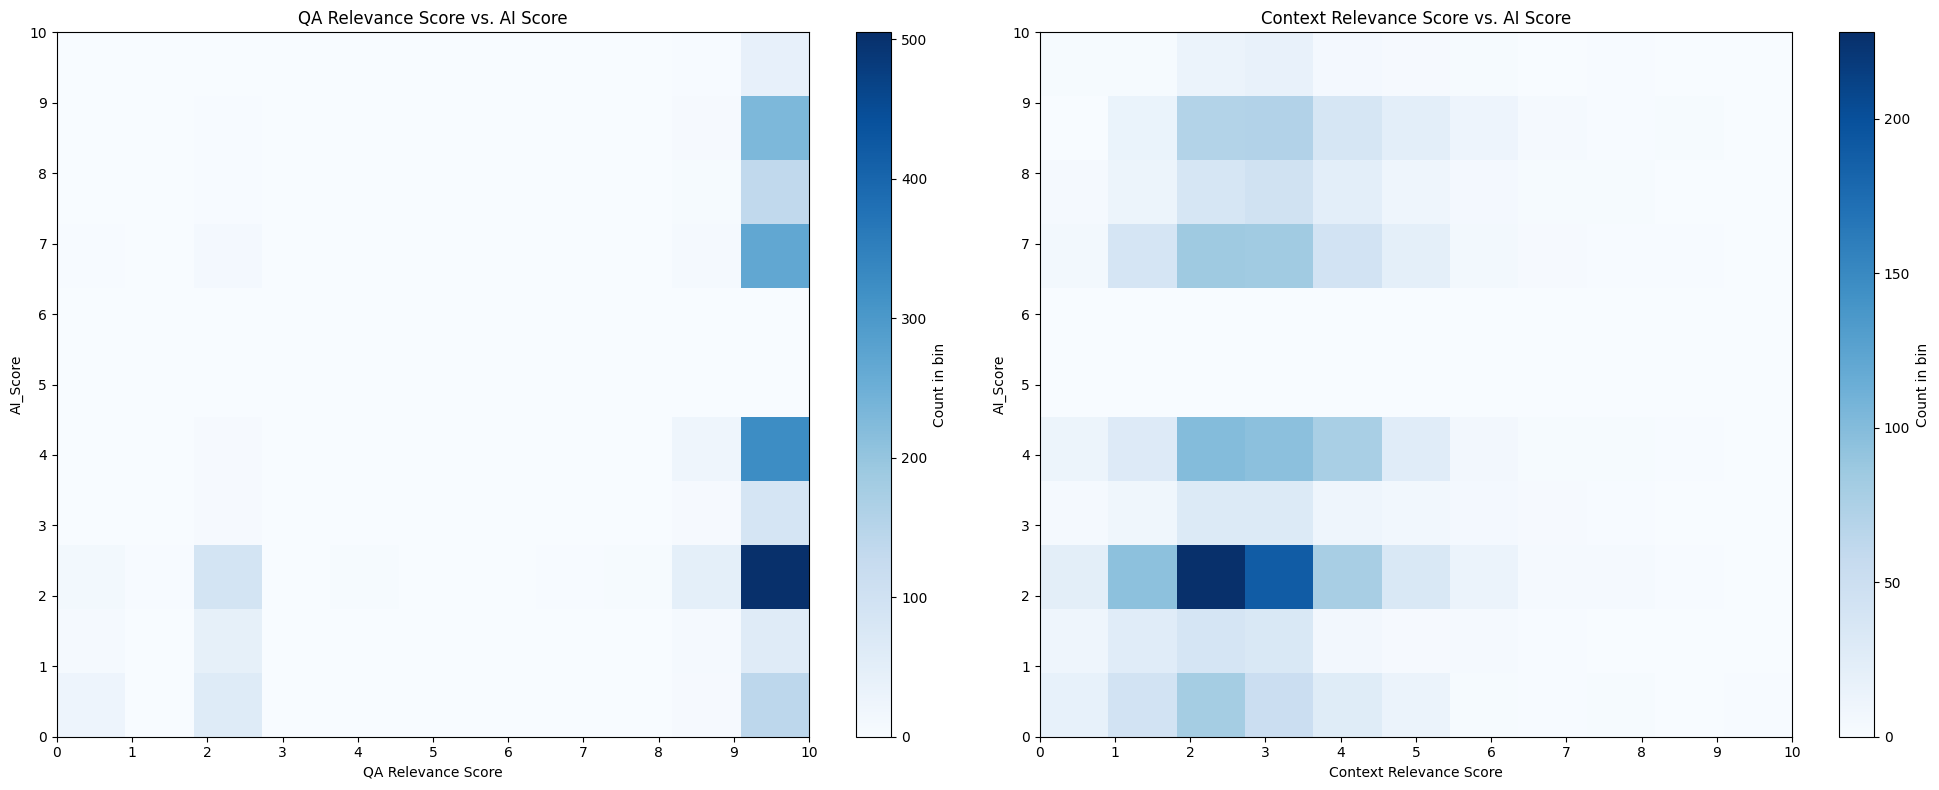

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))



# 2D Histogram for Bouncer_Score vs. AI_Score

h1 = axes[1].hist2d(df['context_relevance'], df['AI_Score'], bins=[11, 11], range=[[0, 10], [0, 10]], cmap='Blues')

axes[1].set_title('Context Relevance Score vs. AI Score')

axes[1].set_xlabel('Context Relevance Score')

axes[1].set_ylabel('AI_Score')

axes[1].set_xticks(np.arange(0, 11))

axes[1].set_yticks(np.arange(0, 11))

fig.colorbar(h1[3], ax=axes[1], label='Count in bin')



# 2D Histogram for rag_score vs. AI_Score

h2 = axes[0].hist2d(df['qa_relevance'], df['AI_Score'], bins=[11, 11], range=[[0, 10], [0, 10]], cmap='Blues')

axes[0].set_title('QA Relevance Score vs. AI Score')

axes[0].set_xlabel('QA Relevance Score')

axes[0].set_ylabel('AI_Score')

axes[0].set_xticks(np.arange(0, 11))

axes[0].set_yticks(np.arange(0, 11))

fig.colorbar(h2[3], ax=axes[0], label='Count in bin')



# Display the plots

plt.tight_layout()

plt.show()

In [17]:
df["qa_relevance"].describe()

count    2210.000000
mean        8.847511
std         2.814919
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: qa_relevance, dtype: float64

Metric: AI_Score
Minimum: 0
First Quartile (Q1): 2.0
Median: 3.0
Third Quartile (Q3): 7.0
Maximum: 10


Metric: Bouncer_Score
Minimum: 4.0
First Quartile (Q1): 7.0
Median: 8.0
Third Quartile (Q3): 9.0
Maximum: 10


Metric: context_relevance
Minimum: 0.0
First Quartile (Q1): 2.1
Median: 2.8000000000000007
Third Quartile (Q3): 3.6000000000000005
Maximum: 5.800000000000001


Metric: qa_relevance
Minimum: 10.0
First Quartile (Q1): 10.0
Median: 10.0
Third Quartile (Q3): 10.0
Maximum: 10.0


Metric: rag_score
Minimum: 0.0
First Quartile (Q1): 0.0
Median: 5.0
Third Quartile (Q3): 6.25
Maximum: 10.0




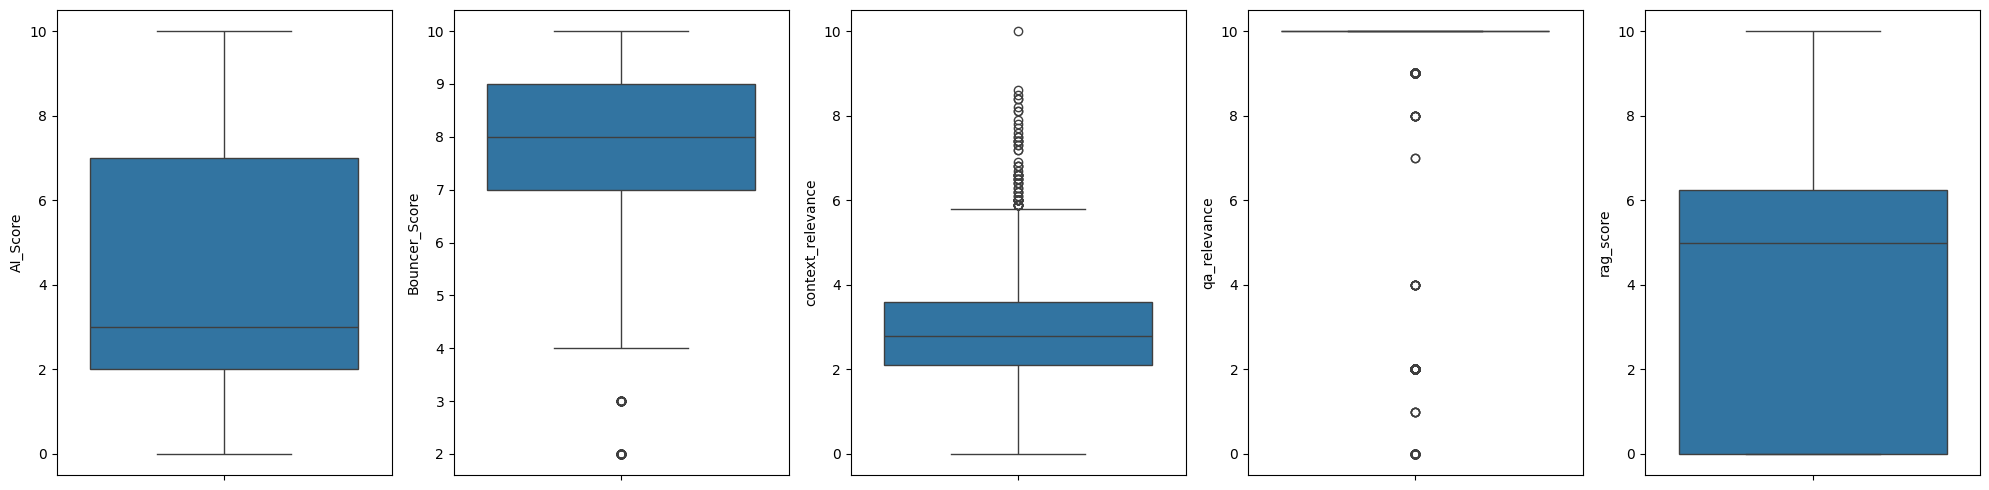

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5), sharey=False)
metrics = df.columns

for i, metric in enumerate(metrics):
    q1 = df[metric].quantile(0.25)
    median = df[metric].median()
    q3 = df[metric].quantile(0.75)
    iqr = q3 - q1
    minimum = df[metric].where(df[metric] >= q1 - 1.5 * iqr).min()
    maximum = df[metric].where(df[metric] <= q3 + 1.5 * iqr).max()
    outliers = df[metric][(df[metric] < q1 - 1.5 * iqr) | (df[metric] > q3 + 1.5 * iqr)].values
    
    print(f"Metric: {metric}")
    print(f"Minimum: {minimum}")
    print(f"First Quartile (Q1): {q1}")
    print(f"Median: {median}")
    print(f"Third Quartile (Q3): {q3}")
    print(f"Maximum: {maximum}")
    # Outliers: {outliers}
    print(f"\n")
    sns.boxplot(y=df[metric], ax=ax[i])
    # ax[i].set_title(metric)

plt.tight_layout()
plt.show()

In [10]:
len(df[df["AI_Score"] == 7])

290

In [11]:
df["AI_Score"].describe()

count    2210.000000
mean        4.055656
std         3.026677
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        10.000000
Name: AI_Score, dtype: float64

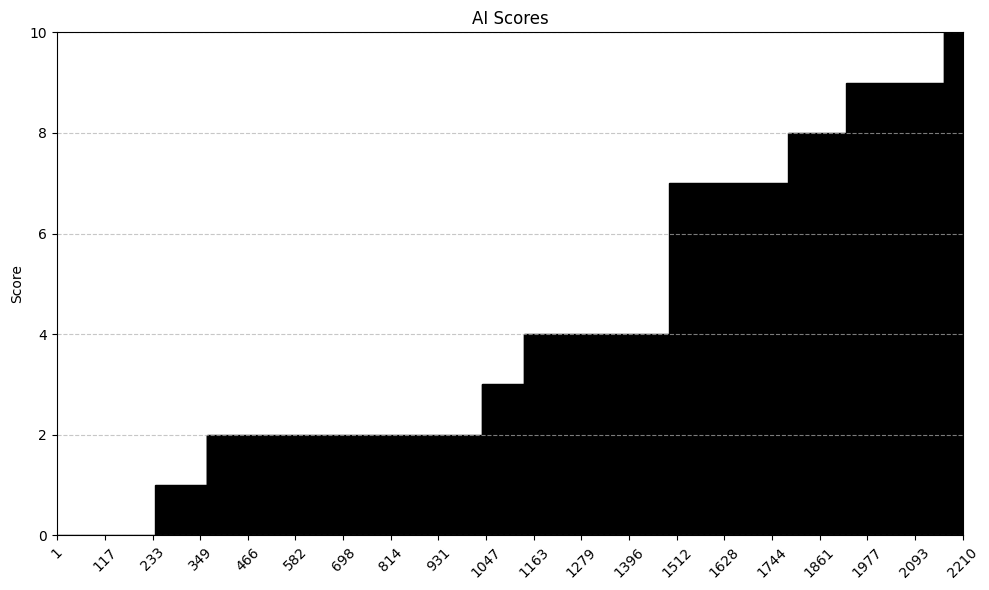

In [12]:
plt.figure(figsize=(10, 6))
sorted_df = df.sort_values('AI_Score')
sorted_df['AI_Score'].plot(kind='bar', width=1, color='skyblue', edgecolor='black')

plt.title('AI Scores')
plt.ylabel('Score')
plt.xticks([])
plt.ylim(0, 10)
plt.xticks(np.linspace(0, len(sorted_df) - 1, num=20), labels=[str(int(x)) for x in np.linspace(1, len(sorted_df), num=20)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()